<a href="https://colab.research.google.com/github/meena25091992/credit_card_defalut_prediction/blob/main/Individual_Copy_Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# Objective:

* Objective of our project is to predict which customer might default in upcoming months. Before going any fudther let's have a quick look on definition of what actually meant by Credit Card Default.

* We are all aware what is credit card. It is type of payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.

* Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.

In [711]:
# Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [712]:
# Mounting drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [713]:
# Importing Dataset
file_path = '/content/drive/MyDrive/Meenakshi_Supervised_Classification_ML_Project/default of credit card clients.xls'

In [714]:
# Reading our Dataset
credit_data = pd.read_excel(file_path, header=1)

In [715]:
# head gives the top 5 rows of the given dataset
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [716]:
#info() print the basic information of our DataFrame
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [717]:
# describe() gives the overall descriptive summary of the dataframe
credit_data.describe(include='all').T    # As there are 25 columns in dataset and all are numerical so we tranform it 


,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [718]:
#  Shape give the total number of rows and columns
print('Rows {} , Columns {}'.format(credit_data.shape[0], credit_data.shape[1]))



Rows 30000 , Columns 25


In [719]:
# Print names of each column in a list
credit_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

# Preprocessing the dataset

In real world the data has a lot of missing values and it is due to data corruption or fail to record the data. For that purpose it is very important to handle the missing values also many of machine learning algorithms does not support missing values, that's why we check missing values first.

In [720]:
# Checking the total null values in our dataset.
credit_data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [721]:
# Checking the totol number of duplicate values 
print('Duplicate values in our dataset is:',len(credit_data[credit_data.duplicated()]))

Duplicate values in our dataset is: 0


* We see there are no null values nor duplicate values in our given dataset.
* We are creating a copy of dataframe because whatever we applying a conditions on the given data so that it doesn't affect our original dataset.

In [722]:
# Creating a copy of dataframe
credit_defaulter_df = credit_data.copy()

In [723]:
# head gives the top 5 rows of the given dataset
credit_defaulter_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Rename the column for better convinience

In [724]:
# renaming the column feature for better understanding
credit_defaulter_df.rename(columns = {'default payment next month':'Defaulter_Payment','PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN',
                     
                   'PAY_5':'PAY_MAY','PAY_6':'PAY_APR','BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL',

                   'BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR','PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG',
                   
                   'PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'} ,inplace=True )




In [710]:
# tail gives the top 5 rows of the given dataset
credit_defaulter_df.tail()

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,...,TOTAL_BILL_PAY,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
29991,210000,3,2,2,2,2,2,2500,2500,2500,...,15000,0,0,1,0,1,0,1,0,0
29992,10000,0,0,0,-2,-2,-2,8802,10400,0,...,19202,0,0,0,1,1,0,1,0,0
29994,80000,2,2,2,2,2,2,72557,77708,79384,...,470933,0,0,1,0,1,0,0,1,0
29996,150000,-1,-1,-1,-1,0,0,1683,1828,3502,...,21182,0,0,0,1,1,0,0,1,0
29999,50000,0,0,0,0,0,0,47929,48905,49764,...,230874,0,0,1,0,1,0,1,0,0


# Exploratory Data Analysis (EDA)

In [725]:
# value_counts() method will count the different class values of 'Default_Payment'column of the given dataset 
credit_defaulter_df['Defaulter_Payment'].value_counts()


0    23364
1     6636
Name: Defaulter_Payment, dtype: int64

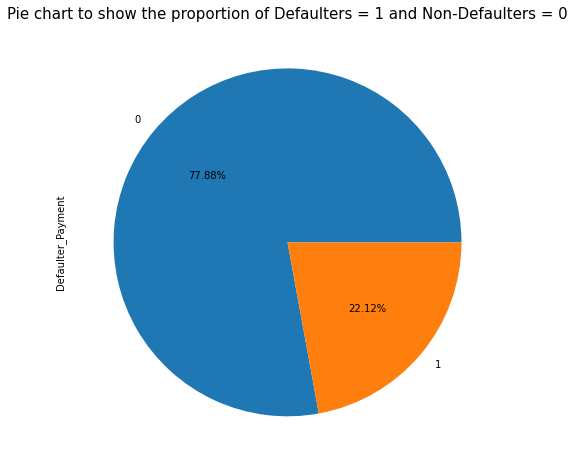

In [732]:
# plot pie chart to show the proportion of Defaulters and Non-Defaulters
# replace '0' with 'Non-Defaulter' and '1' with 'Defaulter' 
#  autopct parameter enables you to display the percent value using Python string formatting  

credit_defaulter_df['Defaulter'] = credit_defaulter_df.Defaulter_Payment.replace([1,0], ['Defaulter', 'Non-Defaulter'])
credit_defaulter_df['Defaulter_Payment'].value_counts().plot(kind="pie",autopct='%1.2f%%',figsize=(8,8))
plt.title("Pie chart to show the proportion of Defaulters = 1 and Non-Defaulters = 0" , Size = 15)
plt.show()

* The above Pie chart conclude that No. of defaulters are less
* Non-defaulters are around 77.88% and Defaulters are around 22.12%

In [727]:
# Find number of Defaulters according to the 'LIMIT_BAL' 
credit_defaulter_df.groupby(['LIMIT_BAL', 'Defaulter']).size().unstack()

Defaulter,Defaulter,Non-Defaulter
LIMIT_BAL,,
10000,197.0,296.0
16000,NaN,2.0
20000,698.0,1278.0
30000,568.0,1042.0
40000,92.0,138.0
...,...,...
750000,NaN,4.0
760000,NaN,1.0
780000,NaN,2.0


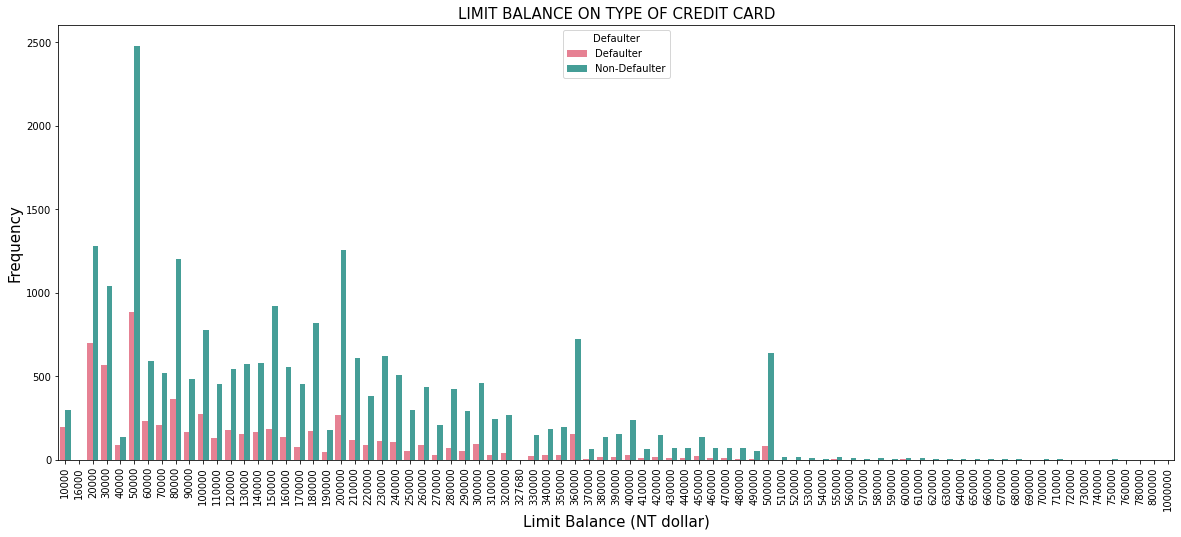

In [734]:
# plotting the count plot to vizualize the data distribution with respect to Limit Balance

plt.figure(figsize=[20, 8]) # figsize is used to set the size of graph
sns.countplot( x='LIMIT_BAL', hue = 'Defaulter',data =credit_defaulter_df, palette = 'husl')
plt.xticks(rotation = 90) # Rotate the value of x-axis to 45 degree angle
plt.xlabel('Limit Balance (NT dollar)', SIZE=15) # Set the x-axis label 
plt.ylabel('Frequency', SIZE=15)  # Set the x-axis label
plt.title('LIMIT BALANCE ON TYPE OF CREDIT CARD', SIZE=15) # Set the graph title
plt.show()



* From the above graph, We find out the number of Defaulters and Non-defaulters according to the LIMIT balance.


In [ ]:
# Counting the number of Males and Females 
print('SEX column distribution : 1=Male, 2=Female')
credit_defaulter_df['SEX'].value_counts()



SEX column distribution : 1=Male, 2=Female


2    18112
1    11888
Name: SEX, dtype: int64

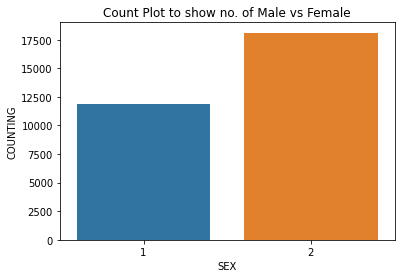

In [ ]:
# Plot the count plot to show the number of Males and Females category

sns.countplot(credit_defaulter_df['SEX'])
plt.title("Count Plot to show no. of Male vs Female")
plt.ylabel("COUNTING")
plt.show()

* 1 represent Male and 2 represent Female
* Females customers are more than Male customers

In [ ]:
# Plot the count plot to show the distribution of education category 

print('Education column distribution : 1=Graduate school, 2=University, 3=High school, 4=Others, 5=unknown, 6=unknown')
credit_defaulter_df['EDUCATION'].value_counts()

EDUCATION column distribution : 1=Graduate school, 2=University, 3=High school, 4=Others, 5=unknown, 6=unknown


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

* 1 represent Graduate
* 2 represent University
* 3 represent High School
* 4 represent Others
* 5 and 6 represent unknown .It's not a category

In [ ]:
# As 5 and 6 are unknown category which represent nothing .So,we replace 4,5,6 with 0 as others   
credit_defaulter_df["EDUCATION"]=credit_defaulter_df["EDUCATION"].replace({4:0,5:0,6:0})

In [ ]:
# Values are replaced and represented as 0
credit_defaulter_df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

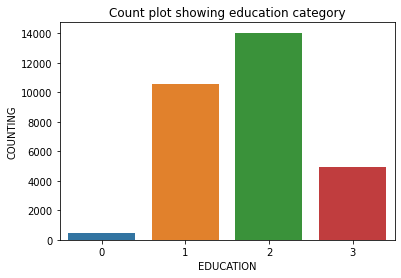

In [ ]:
# Plot the count plot which showing the different education category 
sns.countplot(credit_defaulter_df['EDUCATION'])
plt.title("Count plot showing education category")
plt.ylabel("COUNTING")
plt.show()

In [ ]:
# Count the total number of different Marriage category
credit_defaulter_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
# Replace 0 with 3 
credit_defaulter_df['MARRIAGE']=credit_defaulter_df['MARRIAGE'].replace({0:3})

In [ ]:
# Count the number of Marriag
credit_defaulter_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

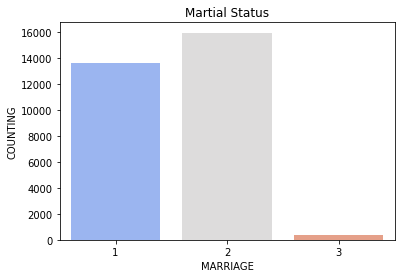

In [ ]:
sns.countplot(credit_defaulter_df['MARRIAGE'],palette = 'coolwarm')
plt.title("Martial Status")
plt.ylabel("COUNTING")
plt.show()

In [ ]:
credit_defaulter_df.groupby('SEX')['Defaulter'].value_counts()

SEX  Defaulter    
1    Non-Defaulter     9015
     Defaulter         2873
2    Non-Defaulter    14349
     Defaulter         3763
Name: Defaulter, dtype: int64

Text(0.5, 1.0, 'Distribution of Male vs Female Defaulters ')

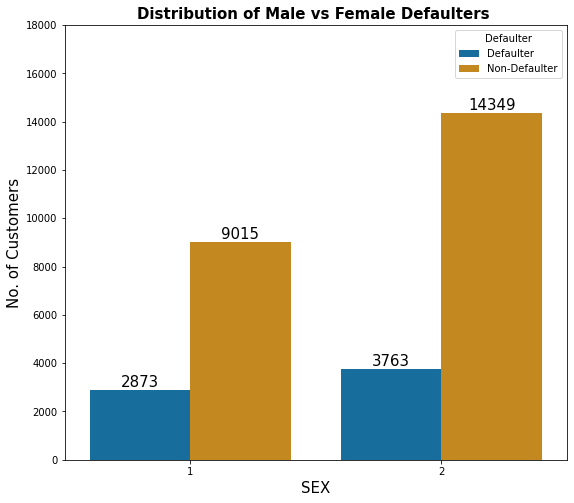

In [ ]:
plt.figure(figsize=(9,8))
ax = sns.countplot(x="SEX", data=credit_defaulter_df,  palette = 'colorblind', hue="Defaulter")

#  Iterrating over the bars one-by-one
for bar in ax.patches:
   
  #  Using Matplotlib's annotate function and
  #  passing the coordinates where the annotation shall be done
  #  Annotation means adding notes to a diagram stating what values do it represents. 
  #  It often gets tiresome for the user to read the values from the graph when the graph is scaled down 
  #  or is overly populated
  #  x-coordinate: bar.get_x() + bar.get_width() / 2
  #  y-coordinate: bar.get_height()
  #  free space to be left to make graph pleasing: (0, 8)
  #  ha and va stand for the horizontal and vertical alignment
  
     ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
     
plt.xlabel("SEX", fontsize= 15)
plt.ylabel("No. of Customers", fontsize= 15)
plt.ylim(0,18000)
plt.title('Distribution of Male vs Female Defaulters ',weight ='bold', fontsize= 15)


In [ ]:
print(credit_defaulter_df.groupby(['EDUCATION', 'Defaulter']).size().unstack()) 

Defaulter  Defaulter  Non-Defaulter
EDUCATION                          
0                 33            435
1               2036           8549
2               3330          10700
3               1237           3680


Text(0.5, 1.0, 'Distribution of defaulters education-wise ')

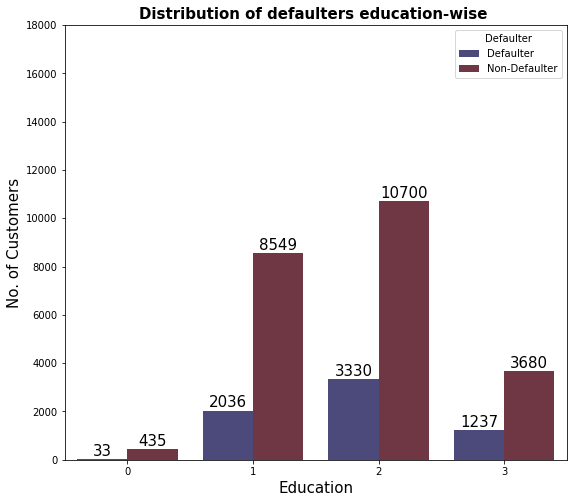

In [ ]:
plt.figure(figsize=(9,8))
ax = sns.countplot(x="EDUCATION", data=credit_defaulter_df,  palette = 'icefire', hue="Defaulter")

#  Iterrating over the bars one-by-one
for bar in ax.patches:
   
  #  Using Matplotlib's annotate function and
  #  passing the coordinates where the annotation shall be done
  #  Annotation means adding notes to a diagram stating what values do it represents. 
  #  It often gets tiresome for the user to read the values from the graph when the graph is scaled down 
  #  or is overly populated
  #  x-coordinate: bar.get_x() + bar.get_width() / 2
  #  y-coordinate: bar.get_height()
  #  free space to be left to make graph pleasing: (0, 8)
  #  ha and va stand for the horizontal and vertical alignment
  
     ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
     
plt.xlabel("Education", fontsize= 15)
plt.ylabel("No. of Customers", fontsize= 15)
plt.ylim(0,18000)
plt.title('Distribution of defaulters education-wise ',weight ='bold', fontsize= 15)


In [ ]:
print(credit_defaulter_df.groupby(['MARRIAGE', 'Defaulter']).size().unstack()) 

Defaulter  Defaulter  Non-Defaulter
MARRIAGE                           
1               3206          10453
2               3341          12623
3                 89            288


Text(0.5, 1.0, 'Distribution of defaulters acc. to martial status')

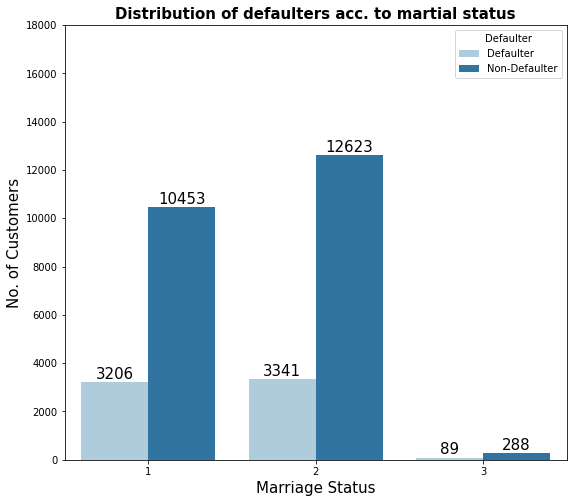

In [ ]:
plt.figure(figsize=(9,8))
ax = sns.countplot(x="MARRIAGE", data=credit_defaulter_df,  palette = 'Paired', hue="Defaulter")

#  Iterrating over the bars one-by-one
for bar in ax.patches:
   
  #  Using Matplotlib's annotate function and
  #  passing the coordinates where the annotation shall be done
  #  Annotation means adding notes to a diagram stating what values do it represents. 
  #  It often gets tiresome for the user to read the values from the graph when the graph is scaled down 
  #  or is overly populated
  #  x-coordinate: bar.get_x() + bar.get_width() / 2
  #  y-coordinate: bar.get_height()
  #  free space to be left to make graph pleasing: (0, 8)
  #  ha and va stand for the horizontal and vertical alignment
  
     ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
     
plt.xlabel("Marriage Status", fontsize= 15)
plt.ylabel("No. of Customers", fontsize= 15)
plt.ylim(0,18000)
plt.title('Distribution of defaulters acc. to martial status',weight ='bold', fontsize= 15)


In [ ]:
# Here we groupby Age and Defaulter column to get number of defaults and non defaults. 
df_age =  credit_defaulter_df.groupby(['AGE', 'Defaulter']).size().unstack()
df_age.head(10)

Defaulter,Defaulter,Non-Defaulter
AGE,,
21,14.0,53.0
22,169.0,391.0
23,247.0,684.0
24,300.0,827.0
25,302.0,884.0
26,253.0,1003.0
27,313.0,1164.0
28,286.0,1123.0
29,313.0,1292.0


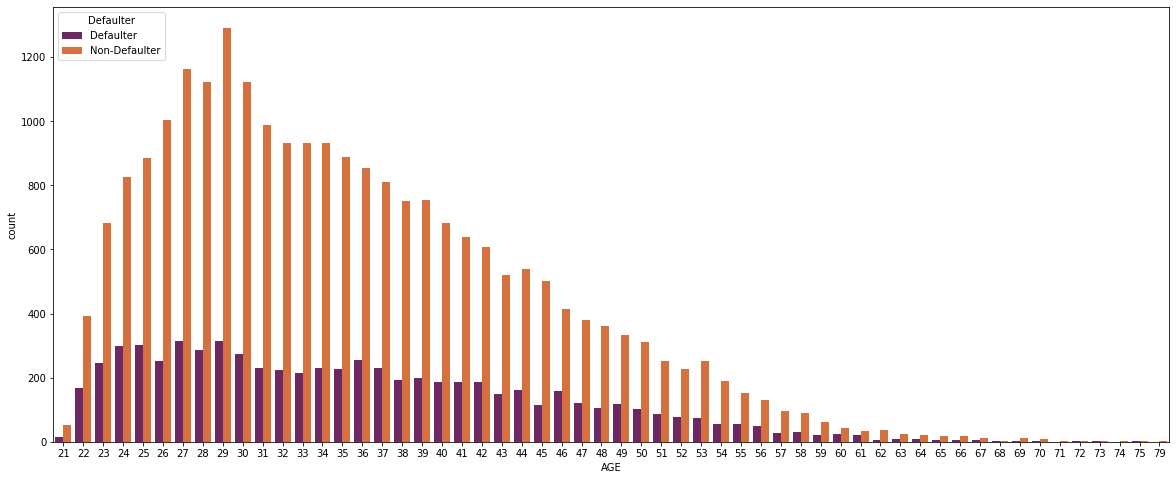

In [ ]:
#plotting the count plot to vizualize the data distribution with respect to Age
plt.figure(figsize=[20, 8])
sns.countplot(x = 'AGE', hue = 'Defaulter',data =credit_defaulter_df, palette = 'inferno')

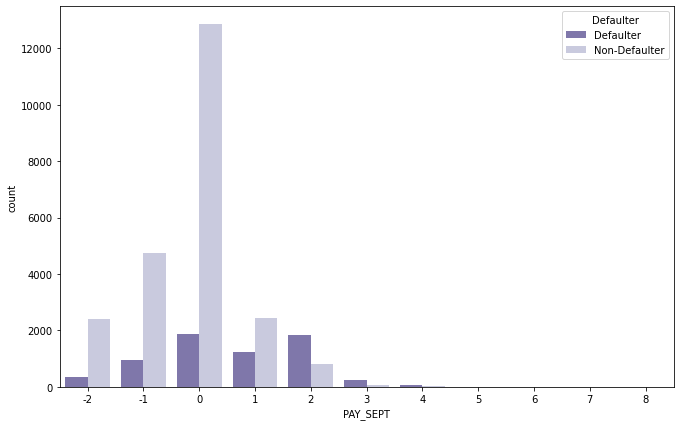

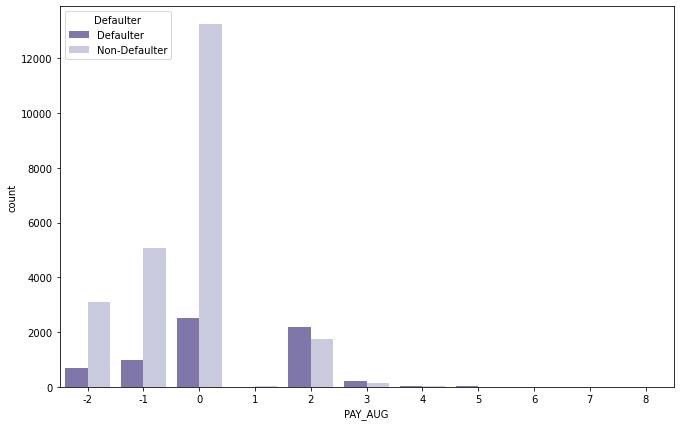

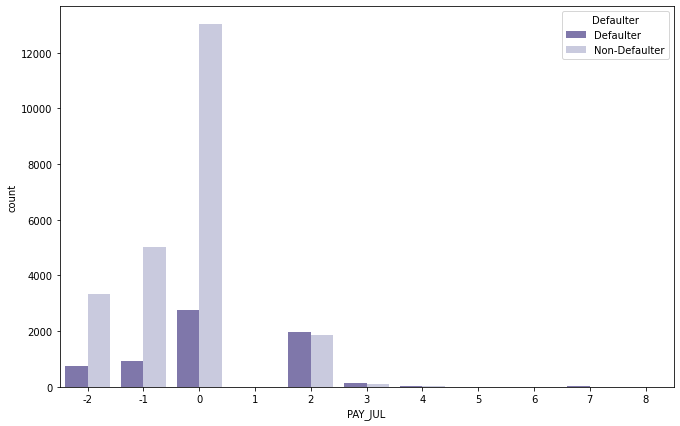

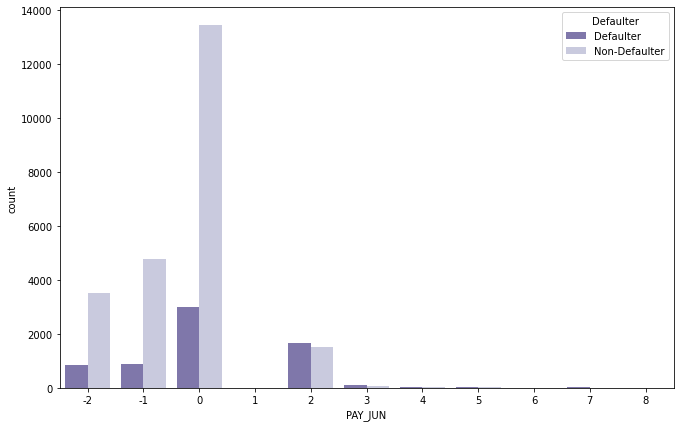

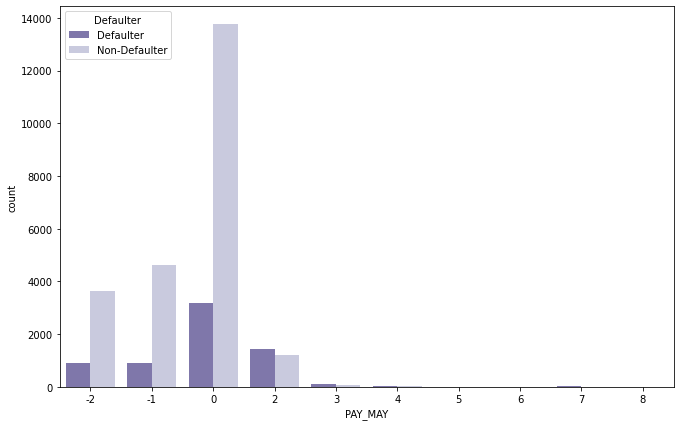

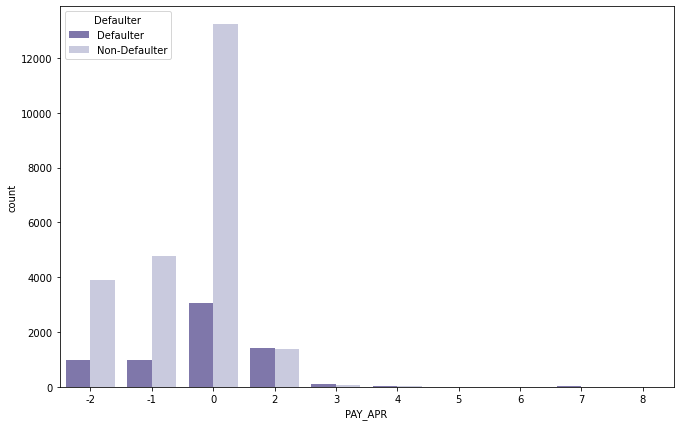

In [ ]:
# looking at the payment columns for each month.
payment_column_list = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']

# Plotting graph for payment columns 
for pay_column in payment_column_list:
  plt.figure(figsize=(11,7))
  sns.countplot(x = pay_column, hue = 'Defaulter', data = credit_defaulter_df ,palette = 'Purples_r')

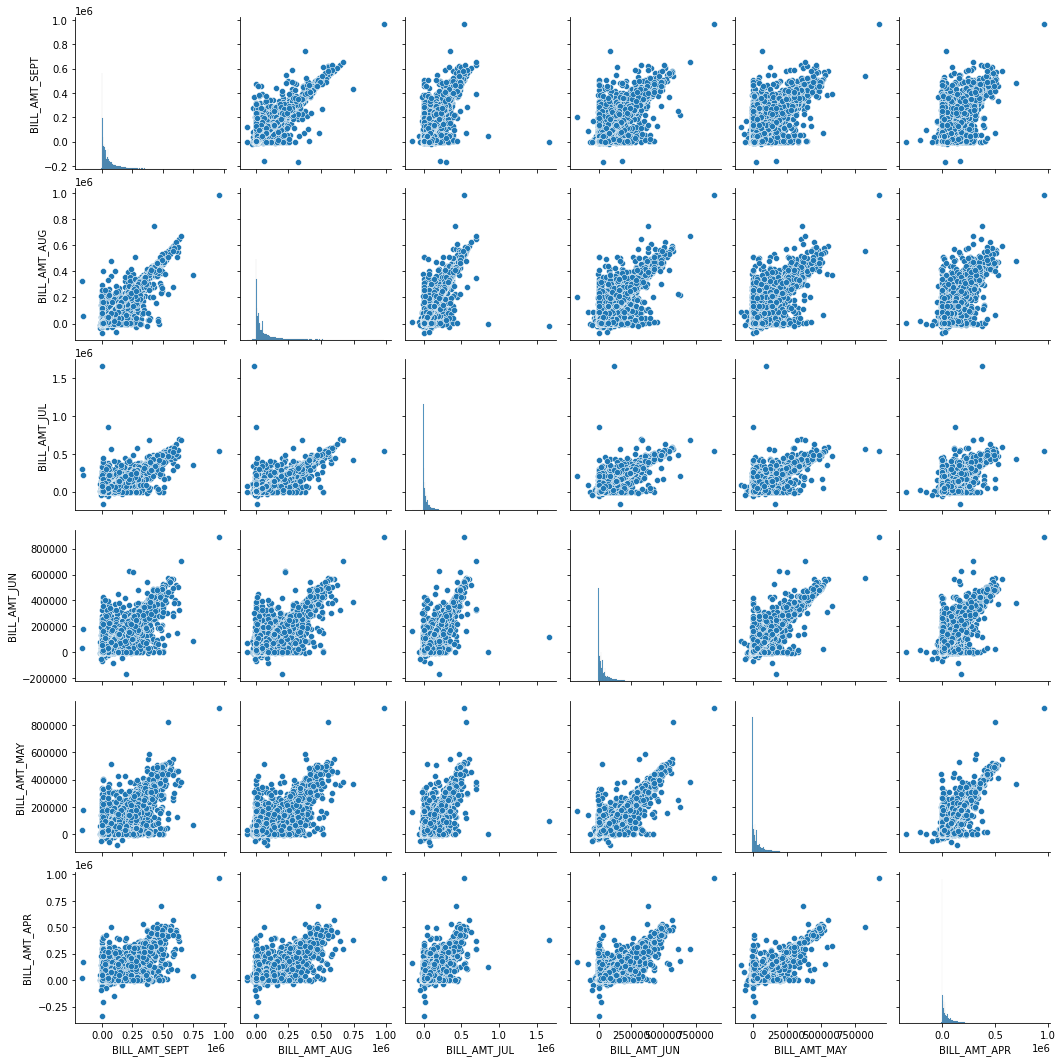

In [ ]:
#assign the bill amount features to a single variable 
df_bill_amount = credit_defaulter_df[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']]
sns.pairplot(data = df_bill_amount) #plotting the pair plot for bill amount

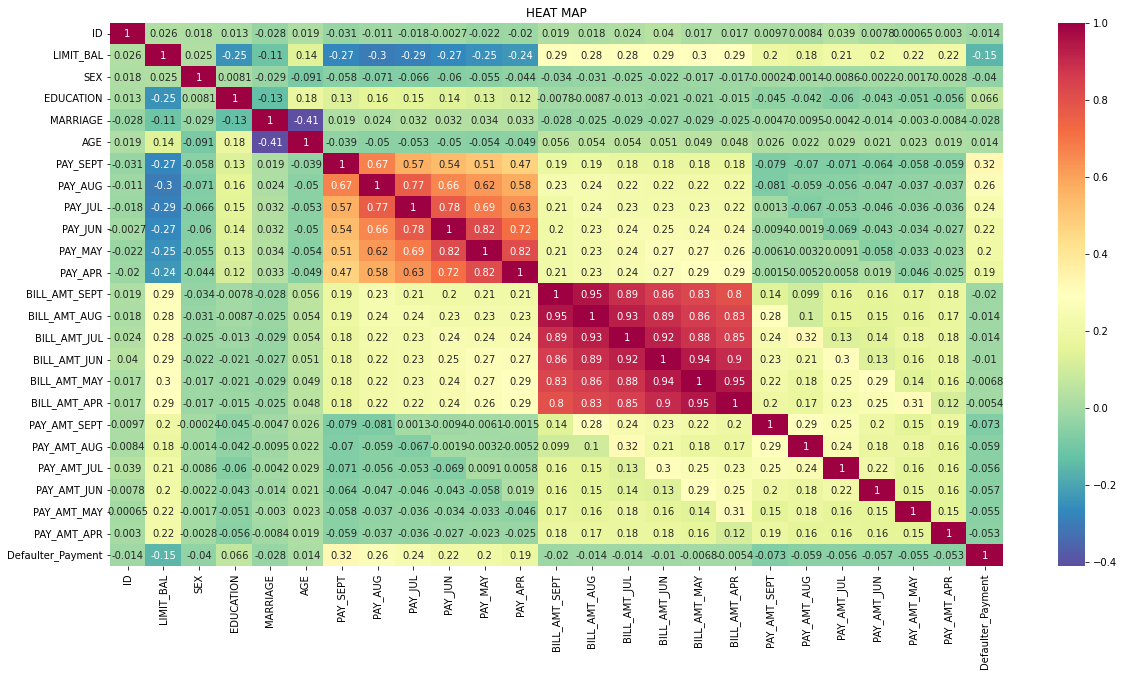

In [ ]:
plt.figure (figsize= (20,10))
corelation= credit_defaulter_df.corr()
sns.heatmap(corelation, annot=True, cmap='Spectral_r')
plt.title("HEAT MAP")
plt.show()

In [ ]:
#  Checking Inter-Quartile range value for "LIMIT_BAL" column 

Q1 = credit_defaulter_df['LIMIT_BAL'].quantile(0.25)  #  lower range
Q3 = credit_defaulter_df['LIMIT_BAL'].quantile(0.75)  #  upper range

IQR = Q3 - Q1 # interquartile range
print(IQR)


190000.0


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 25 Text major ticklabel objects>)

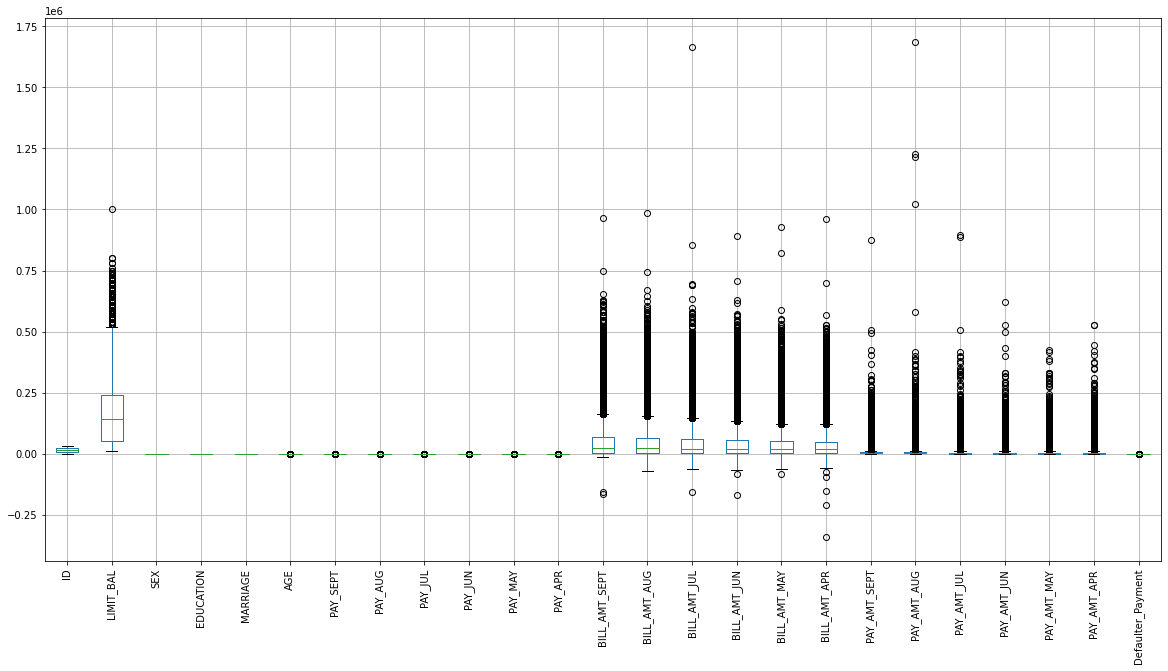

In [ ]:
#  draw box plot to see if there is any outliers in our dataset
plt.figure (figsize= (20,10))
credit_defaulter_df.boxplot()
plt.xticks(rotation=90) #  rotate each value at x-axis to 90 degree angle

In [ ]:
credit_defaulter_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'Defaulter_Payment',
       'Defaulter'],
      dtype='object')

In [ ]:
# creating list for columns having outliers
cols = ['LIMIT_BAL', 'BILL_AMT_SEPT','BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
                 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL','PAY_AMT_JUN', 'PAY_AMT_MAY',
                 'PAY_AMT_APR']
#  dropping outliers for columns which have outliers in our dataframe
Q1 = credit_defaulter_df[cols].quantile(0.25)  #  lower range
Q3 = credit_defaulter_df[cols].quantile(0.75)  #  upper range

IQR = Q3 - Q1 # interquartile range

# using interquartile range to find outliers in the data and remove them
credit_defaulter_df = credit_defaulter_df[~((credit_defaulter_df[cols] < (Q1 - 1.5 * IQR)) |(credit_defaulter_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
 

In [ ]:
#  dropping outliers for "LIMIT_BAL" which have outliers in our dataframe
Q1 = credit_defaulter_df['LIMIT_BAL'].quantile(0.25)  #  lower range
Q3 = credit_defaulter_df['LIMIT_BAL'].quantile(0.75)  #  upper range

IQR = Q3 - Q1 # interquartile range
print(IQR)


150000.0


In [ ]:
credit_defaulter_df.shape

(19731, 26)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 25 Text major ticklabel objects>)

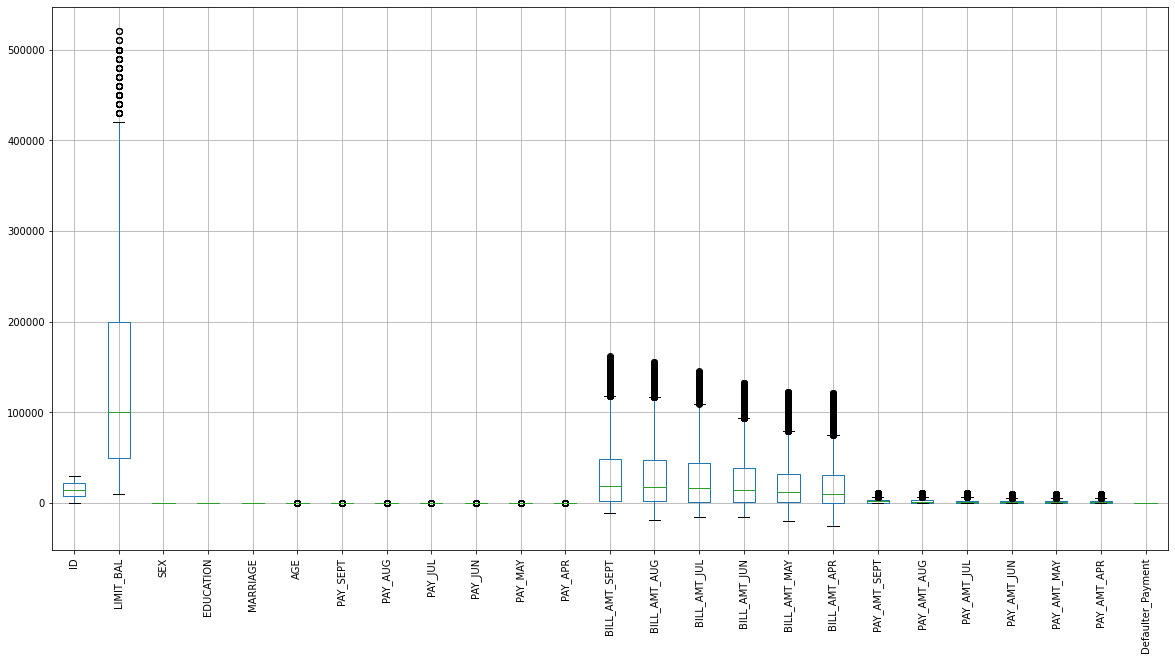

In [ ]:
#  draw box plot to see if there is any outliers in our dataset
plt.figure (figsize= (20,10))
credit_defaulter_df.boxplot()
plt.xticks(rotation=90) #  rotate each value at x-axis to 90 degree angle

In [ ]:
# removing some columns that are unimportant.
credit_defaulter_df.drop(['ID','Defaulter','AGE'], axis=1,inplace =True)

In [ ]:
credit_defaulter_df.shape

(19731, 23)

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(credit_defaulter_df[[i for i in credit_defaulter_df.describe().columns if i not in ['Defaulter_Payment']]])

,variables,VIF
0,LIMIT_BAL,2.898259
1,SEX,8.433152
2,EDUCATION,5.599418
3,MARRIAGE,6.313003
4,PAY_SEPT,1.858743
5,PAY_AUG,3.509619
6,PAY_JUL,4.636735
7,PAY_JUN,5.607335
8,PAY_MAY,6.361494
9,PAY_APR,4.300316


In [ ]:
credit_defaulter_df['TOTAL_BILL_PAY'] = credit_defaulter_df['BILL_AMT_SEPT'] + credit_defaulter_df['BILL_AMT_AUG'] + credit_defaulter_df['BILL_AMT_JUL'] + credit_defaulter_df['BILL_AMT_JUN'] +  credit_defaulter_df['BILL_AMT_MAY'] + credit_defaulter_df['BILL_AMT_APR'] 

In [ ]:
calc_vif(credit_defaulter_df[[i for i in credit_defaulter_df.describe().columns if i not in ['Defaulter_Payment','BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']]])

,variables,VIF
0,LIMIT_BAL,2.882937
1,SEX,8.424020
2,EDUCATION,5.587310
3,MARRIAGE,6.304269
4,PAY_SEPT,1.857488
5,PAY_AUG,3.435968
6,PAY_JUL,4.589257
7,PAY_JUN,5.588403
8,PAY_MAY,6.322405
9,PAY_APR,4.217279


In [ ]:
#get dummies variable
credit_defaulter_df = pd.get_dummies(credit_defaulter_df,columns=['EDUCATION','SEX','MARRIAGE'])

In [ ]:
credit_defaulter_df

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,...,TOTAL_BILL_PAY,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,...,7704,0,0,1,0,0,1,1,0,0
1,120000,-1,2,0,0,0,2,2682,1725,2682,...,17077,0,0,1,0,0,1,0,1,0
2,90000,0,0,0,0,0,0,29239,14027,13559,...,101653,0,0,1,0,0,1,0,1,0
3,50000,0,0,0,0,0,0,46990,48233,49291,...,231334,0,0,1,0,0,1,1,0,0
5,50000,0,0,0,0,0,0,64400,57069,57608,...,238114,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,210000,3,2,2,2,2,2,2500,2500,2500,...,15000,0,0,1,0,1,0,1,0,0
29992,10000,0,0,0,-2,-2,-2,8802,10400,0,...,19202,0,0,0,1,1,0,1,0,0
29994,80000,2,2,2,2,2,2,72557,77708,79384,...,470933,0,0,1,0,1,0,0,1,0
29996,150000,-1,-1,-1,-1,0,0,1683,1828,3502,...,21182,0,0,0,1,1,0,0,1,0


In [ ]:
credit_defaulter_df['Defaulter_Payment'].value_counts()

0    14626
1     5105
Name: Defaulter_Payment, dtype: int64

In [ ]:
# creating dependent variable and independent variable
independent_variables = credit_defaulter_df.drop(['Defaulter_Payment'],axis=1)

dependent_variable = credit_defaulter_df['Defaulter_Payment']

In [ ]:
dependent_variable

0        1
1        1
2        0
3        0
5        0
        ..
29991    1
29992    0
29994    1
29996    0
29999    1
Name: Defaulter_Payment, Length: 19731, dtype: int64

In [ ]:
#applying zscore to each values of independent variable 

from scipy.stats import zscore  # zcore is used for scaling the data
X = round(independent_variables.apply(zscore),3)

In [ ]:
# applying log on dependent variable 

Y = dependent_variable


In [ ]:
# This method is used to split the dataset into training and test set while buliding the model

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)

X_train:  (15784, 29)
X_test:  (3947, 29)


In [ ]:
from imblearn.over_sampling import SMOTE

smote= SMOTE()
X_train_sm,Y_train_sm = smote.fit_resample(X,Y)

from collections import Counter
print('Original dataset shape', Counter(Y_train))
print('Resample dataset shape', Counter(Y_train_sm))
Counter(Y_train_sm)

Original dataset shape Counter({0: 11750, 1: 4034})
Resample dataset shape Counter({1: 14626, 0: 14626})


Counter({0: 14626, 1: 14626})

In [ ]:
# Importing packages
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc , classification_report

In [ ]:
# Creating empty data frame for each regression model 
i=0
evaluation_metrices_df = pd.DataFrame()

In [ ]:
def print_metrics(actual, predicted):

  print('accuracy_score is {}'.format(accuracy_score(actual, predicted)))
  print(' precision_score is {}'.format( precision_score(actual, predicted)))
  print('recall_score is {}'.format(recall_score(actual, predicted)))
  print('f1_score is {}'.format(f1_score(actual, predicted)))
  print('roc_auc_score is {}'.format( roc_auc_score(actual , predicted)))
  print('confusion_matrix is {}'.format(confusion_matrix(actual , predicted)))
  print('classification_report is {}'.format(classification_report(actual , predicted)))

  # evaluation matrix 

  """  This function is also inserting evaluation metrices of each applied model in 
       empty dataframe create above named as "evaluation_metrices_df"  
  """

  evaluation_metrices_df.loc[i,"Accuracy_Score"] = format(accuracy_score(actual, predicted))
  evaluation_metrices_df.loc[i,"Precision_Score"] = format( precision_score(actual, predicted))
  evaluation_metrices_df.loc[i,"Recall_Score"] = format(recall_score(actual, predicted))
  evaluation_metrices_df.loc[i,"F1_Score"] = format(f1_score(actual, predicted))
  evaluation_metrices_df.loc[i,"RUC_AUC_Score"] = format( roc_auc_score(actual , predicted))
  
  return


# Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 20, 50, 100] }   #set the parmeter

logistic_model= GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, scoring = 'recall', n_jobs = -1, verbose = 3, cv = 3)
logistic_model.fit(X_train_sm, Y_train_sm)            #fit the model 

Fitting 3 folds for each of 34 candidates, totalling 102 fits


GridSearchCV(cv=3, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10, 20, 50, 100],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=3)

In [ ]:
logistic_model.best_estimator_

LogisticRegression(C=0.001, class_weight='balanced')

In [ ]:
logistic_model.best_params_   # best_params will give you the best value from all those combination

{'C': 0.001, 'penalty': 'l2'}

In [ ]:
logistic_model.score(X_train_sm, Y_train_sm)

0.6649801722959114

In [ ]:
# model score on testing data
print(f"testing_model_score:  {logistic_model.score(X_test,Y_test)}")

testing_model_score:  0.6713352007469654


In [ ]:
logistic_model.best_score_

0.667030535046942

In [ ]:
 # to predict the probability
Y_train_preds_logistic = logistic_model.predict_proba(X_train_sm)[:,1]
Y_test_preds_logistic = logistic_model.predict_proba(X_test)[:,1]

In [ ]:
Y_train_preds_logistic

array([0.77489754, 0.49533047, 0.4464122 , ..., 0.75165876, 0.73826512,
       0.57809543])

In [ ]:
Y_test_preds_logistic

array([0.89578644, 0.55836596, 0.2635451 , ..., 0.50314458, 0.40124311,
       0.44194413])

In [ ]:
# Get the y- train & test predicted values
Y_train_class_preds = logistic_model.predict(X_train_sm)
Y_test_class_preds = logistic_model.predict(X_test)



In [ ]:
Y_train_class_preds

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
Y_test_class_preds 

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
# accuracy score of train set and test set
logistic_train_accuracy= accuracy_score(Y_train_sm, Y_train_class_preds)
logistic_test_accuracy= accuracy_score(Y_test, Y_test_class_preds)

print("The accuracy on train data is ", logistic_train_accuracy)
print("The accuracy on test data is ", logistic_test_accuracy)

The accuracy on train data is  0.6772528374128265
The accuracy on test data is  0.6810235621991386


In [ ]:
# print metrics for training data
print_metrics(Y_train_sm,Y_train_class_preds)


accuracy_score is 0.6772528374128265
 precision_score is 0.6817130440877549
recall_score is 0.6649801722959114
f1_score is 0.6732426539300177
roc_auc_score is 0.6772528374128265
confusion_matrix is [[10085  4541]
 [ 4900  9726]]
classification_report is               precision    recall  f1-score   support

           0       0.67      0.69      0.68     14626
           1       0.68      0.66      0.67     14626

    accuracy                           0.68     29252
   macro avg       0.68      0.68      0.68     29252
weighted avg       0.68      0.68      0.68     29252



[Text(0, 0.5, 'Non Defaulter'), Text(0, 1.5, 'IsDefaulter')]

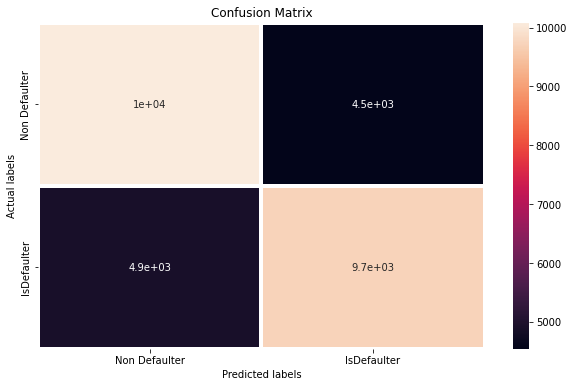

In [ ]:
# Get the confusion matrix for logistic 
labels = ['Non Defaulter', 'IsDefaulter']
cm = confusion_matrix(Y_train_sm,Y_train_class_preds)
plt.figure (figsize= (10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, lw = 3) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

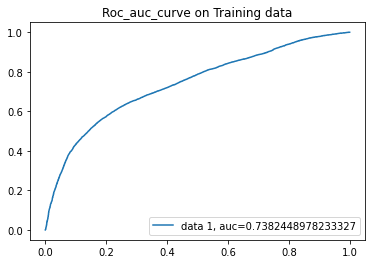

In [ ]:
# Plot Roc_auc_curve for training data
y_train_pred = logistic_model.predict_proba(X_train_sm)[:,1]
fpr, tpr, _ = roc_curve(Y_train_sm,  Y_train_preds_logistic )
auc = roc_auc_score(Y_train_sm,  Y_train_preds_logistic  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:

# print metrics for testing data
print_metrics(Y_test,Y_test_class_preds)
# Inserting metrices for Logistics Regression in the dataframe 
evaluation_metrices_df.loc[i,"Model_Name"]='Logistics regression'
i+=1  # i is a incremented variable

accuracy_score is 0.6810235621991386
 precision_score is 0.44218942189421895
recall_score is 0.6713352007469654
f1_score is 0.5331850203930293
roc_auc_score is 0.6779833166460835
confusion_matrix is [[1969  907]
 [ 352  719]]
classification_report is               precision    recall  f1-score   support

           0       0.85      0.68      0.76      2876
           1       0.44      0.67      0.53      1071

    accuracy                           0.68      3947
   macro avg       0.65      0.68      0.65      3947
weighted avg       0.74      0.68      0.70      3947



[Text(0, 0.5, 'Non Defaulter'), Text(0, 1.5, 'IsDefaulter')]

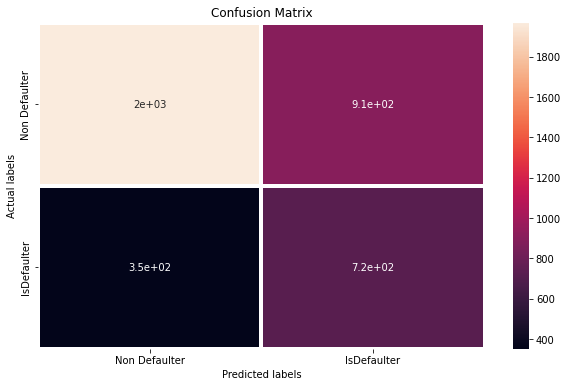

In [ ]:
# Get the confusion matrix for logistic 
labels = ['Non Defaulter', 'IsDefaulter']
cm = confusion_matrix(Y_test,Y_test_class_preds)
plt.figure (figsize= (10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, lw = 3) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

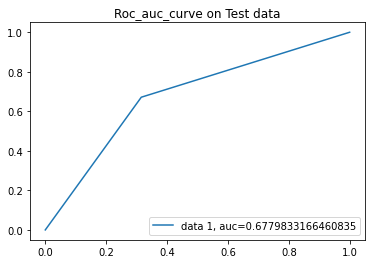

In [ ]:
#Plot Roc_auc_curve for test data
y_train_pred = logistic_model.predict_proba(X_train_sm)[:,1]
fpr, tpr, _ = roc_curve(Y_test,Y_test_class_preds)
auc = roc_auc_score(Y_test,Y_test_class_preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Test data")
plt.legend(loc=4)
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf= RandomForestClassifier() 
grid_values = {'n_estimators':[50,60,70,80,90,100], 'max_depth':[3, 5, 7,9,11,14]}
grid_rf = GridSearchCV(rf, param_grid = grid_values, scoring = 'accuracy', cv=5)

# Fit the object to train dataset
grid_rf.fit(X_train_sm, Y_train_sm)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 14],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='accuracy')

In [ ]:
grid_rf.best_params_

{'max_depth': 14, 'n_estimators': 90}

In [ ]:
optimized_rf=grid_rf.best_estimator_
optimized_rf

RandomForestClassifier(max_depth=14, n_estimators=90)

In [ ]:
grid_rf.best_score_

0.787300731703398

In [ ]:
# model score  on training data
print(f"training_model_score:  {grid_rf.score(X_train_sm,Y_train_sm )}")

# model score on testing data
print(f"testing_model_score:  {grid_rf.score(X_test,Y_test)}")

training_model_score:  0.8937166689457131
testing_model_score:  0.8864960729668102


In [ ]:
# to predict the classes either 1 or 0
# Get the predicted classes
Y_train_class_preds_rf = grid_rf.predict(X_train_sm)
Y_test_class_preds_rf = grid_rf.predict(X_test)

In [ ]:
Y_test_class_preds_rf

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
Y_test

6281     1
10210    0
26384    0
14927    1
7705     0
        ..
14940    0
13816    0
17573    0
12637    1
19502    0
Name: Defaulter_Payment, Length: 3947, dtype: int64

In [ ]:

# Evaluation of training model
print_metrics(Y_train_sm,Y_train_class_preds_rf)

accuracy_score is 0.8937166689457131
 precision_score is 0.9134180486754254
recall_score is 0.8698892383426774
f1_score is 0.891122395377342
roc_auc_score is 0.8937166689457131
confusion_matrix is [[13420  1206]
 [ 1903 12723]]
classification_report is               precision    recall  f1-score   support

           0       0.88      0.92      0.90     14626
           1       0.91      0.87      0.89     14626

    accuracy                           0.89     29252
   macro avg       0.89      0.89      0.89     29252
weighted avg       0.89      0.89      0.89     29252



[[13420  1206]
 [ 1903 12723]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

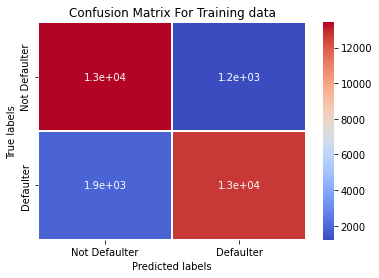

In [ ]:
# Get the confusion matrix for  training  data 

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_train_sm,Y_train_class_preds_rf)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

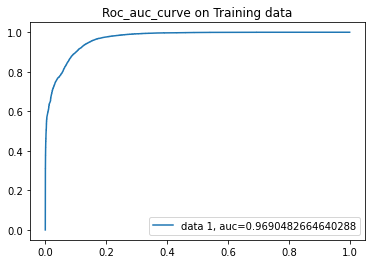

In [ ]:
# Roc_auc_curve
y_train_preds_proba_rf = grid_rf.predict_proba(X_train_sm)[::,1]

fpr, tpr, _ = roc_curve(Y_train_sm,  y_train_preds_proba_rf )
auc = roc_auc_score(Y_train_sm,  y_train_preds_proba_rf  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
# Inserting metrices for Random Forest in the dataframe 
evaluation_metrices_df.loc[i,"Model_Name"]='Random Forest'

# Evaluation of testing model
print_metrics(Y_test,Y_test_class_preds_rf)
i+=1  # i is a incremented variable

accuracy_score is 0.8864960729668102
 precision_score is 0.7778768956289027
recall_score is 0.8141923436041083
f1_score is 0.7956204379562044
roc_auc_score is 0.8638068811205519
confusion_matrix is [[2627  249]
 [ 199  872]]
classification_report is               precision    recall  f1-score   support

           0       0.93      0.91      0.92      2876
           1       0.78      0.81      0.80      1071

    accuracy                           0.89      3947
   macro avg       0.85      0.86      0.86      3947
weighted avg       0.89      0.89      0.89      3947



[[2627  249]
 [ 199  872]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

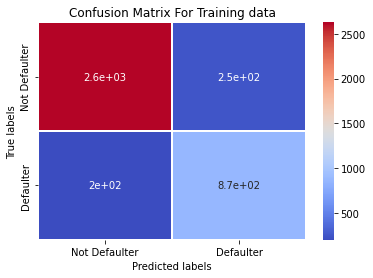

In [ ]:
# Get the confusion matrix for  testing  data 

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_test,Y_test_class_preds_rf)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

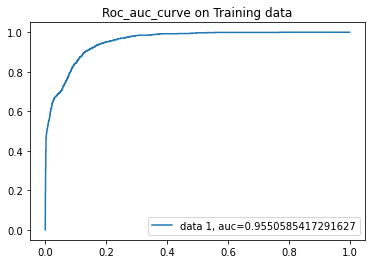

In [ ]:
# Roc_auc_curve
y_test_preds_proba_rf = grid_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,  y_test_preds_proba_rf)
auc = roc_auc_score(Y_test,  y_test_preds_proba_rf)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
features = X_train_sm.columns
importances = grid_rf.best_estimator_.feature_importances_
indices = np.argsort(importances)

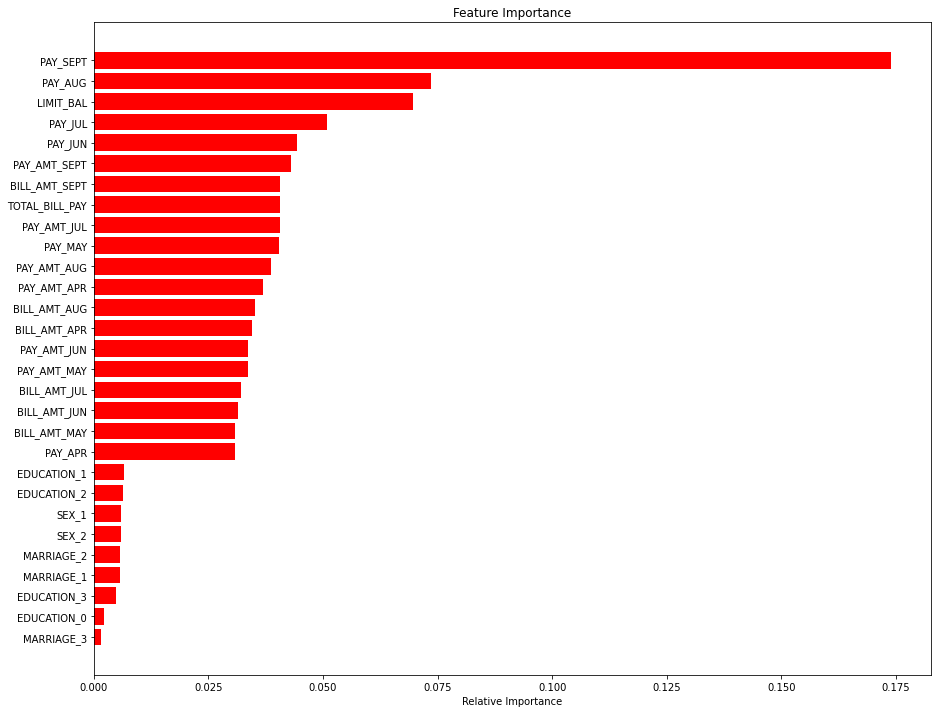

In [ ]:
plt.figure (figsize= (15,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
#knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid, scoring = 'accuracy',cv=3)
knn_cv.fit(X_train_sm,Y_train_sm)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20]},
             scoring='accuracy')

In [ ]:
knn_cv.best_score_

0.7550600867585793

In [ ]:
knn_cv.best_params_

{'n_neighbors': 5}

In [ ]:
optimized_knn=knn_cv.best_estimator_
optimized_knn

KNeighborsClassifier()

In [ ]:
# model score  on training data
print(f"training_model_score:  {knn_cv.score(X_train_sm,Y_train_sm )}")

training_model_score:  0.8472924928210037


In [ ]:
# model score on testing data
print(f"testing_model_score:  {knn_cv.score(X_test,Y_test)}")

testing_model_score:  0.7899670635926019


In [ ]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds_knn = knn_cv.predict(X_train_sm)
y_test_class_preds_knn = knn_cv.predict(X_test)

In [ ]:
y_test_class_preds_knn

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
Y_test

6281     1
10210    0
26384    0
14927    1
7705     0
        ..
14940    0
13816    0
17573    0
12637    1
19502    0
Name: Defaulter_Payment, Length: 3947, dtype: int64

In [ ]:

# Evaluation of training model
print_metrics(Y_train_sm,y_train_class_preds_knn)

accuracy_score is 0.8472924928210037
 precision_score is 0.7929860990944223
recall_score is 0.9399699165869
f1_score is 0.8602446578856804
roc_auc_score is 0.8472924928210037
confusion_matrix is [[11037  3589]
 [  878 13748]]
classification_report is               precision    recall  f1-score   support

           0       0.93      0.75      0.83     14626
           1       0.79      0.94      0.86     14626

    accuracy                           0.85     29252
   macro avg       0.86      0.85      0.85     29252
weighted avg       0.86      0.85      0.85     29252



[[11037  3589]
 [  878 13748]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

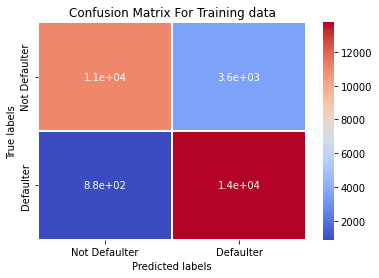

In [ ]:
# Get the confusion matrix for  training  data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_train_sm,y_train_class_preds_knn)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

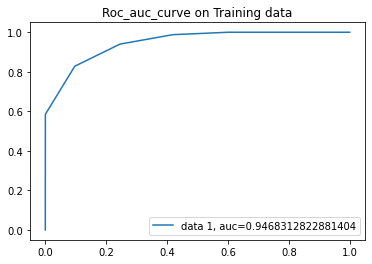

In [ ]:
# Roc_auc_curve on taining data
y_train_preds_proba_knn = knn_cv.predict_proba(X_train_sm)[::,1]

fpr, tpr, _ = roc_curve(Y_train_sm,  y_train_preds_proba_knn )
auc = roc_auc_score(Y_train_sm,  y_train_preds_proba_knn )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
# Inserting metrices for K-Neighbor Classifier in the dataframe 
evaluation_metrices_df.loc[i,"Model_Name"]='K-Neighbor Classifier'

# Evaluation of testing model
print_metrics(Y_test,y_test_class_preds_knn)
i+=1  # i is a incremented variable

accuracy_score is 0.7899670635926019
 precision_score is 0.570926143024619
recall_score is 0.9094304388422035
f1_score is 0.7014764133957508
roc_auc_score is 0.8274551359718666
confusion_matrix is [[2144  732]
 [  97  974]]
classification_report is               precision    recall  f1-score   support

           0       0.96      0.75      0.84      2876
           1       0.57      0.91      0.70      1071

    accuracy                           0.79      3947
   macro avg       0.76      0.83      0.77      3947
weighted avg       0.85      0.79      0.80      3947



[[2144  732]
 [  97  974]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

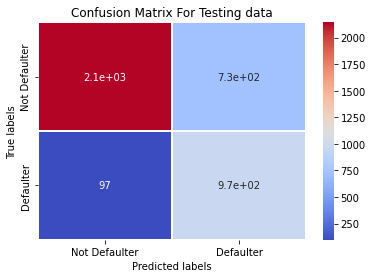

In [ ]:
# Get the confusion matrix for  testing data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_test,y_test_class_preds_knn)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

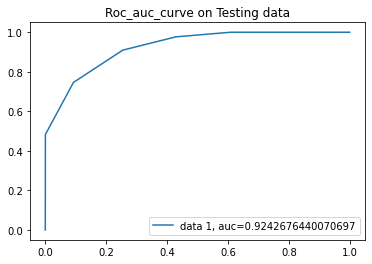

In [ ]:
# Roc_auc_curve testing data
y_test_preds_proba_knn = knn_cv.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(Y_test,  y_test_preds_proba_knn )
auc = roc_auc_score(Y_test,  y_test_preds_proba_knn )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

# Support Vector Machine

In [ ]:
from sklearn import svm
 
#Create a svm Classifier
svm_model = svm.SVC(kernel = 'poly', gamma='scale', probability=True) 
 
#Train the model using the training sets
svm_model.fit(X_train_sm, Y_train_sm)

SVC(kernel='poly', probability=True)

In [ ]:
svm_model.score(X_train_sm, Y_train_sm)

0.7302406673047996

In [ ]:
# Get the y- train & test predicted values
y_train_preds_svm = svm_model.predict(X_train_sm)
y_test_preds_svm = svm_model.predict(X_test)

In [ ]:
#get the accuracy score
svm_train_accuracy= accuracy_score(Y_train_sm, y_train_preds_svm)
svm_test_accuracy= accuracy_score(Y_test, y_test_preds_svm)

print("The accuracy on train data is ", svm_train_accuracy)
print("The accuracy on test data is ", svm_test_accuracy)

The accuracy on train data is  0.7302406673047996
The accuracy on test data is  0.7762857866734229


In [ ]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds_svm = svm_model.predict(X_train_sm)
y_test_class_preds_svm = svm_model.predict(X_test)

In [ ]:
y_test_class_preds_svm

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
Y_test

6281     1
10210    0
26384    0
14927    1
7705     0
        ..
14940    0
13816    0
17573    0
12637    1
19502    0
Name: Defaulter_Payment, Length: 3947, dtype: int64

In [ ]:
# Evaluation of training model
print_metrics(Y_train_sm,y_train_class_preds_svm)

accuracy_score is 0.7302406673047996
 precision_score is 0.7742487173222575
recall_score is 0.6500068371393409
f1_score is 0.7067087901876975
roc_auc_score is 0.7302406673047996
confusion_matrix is [[11854  2772]
 [ 5119  9507]]
classification_report is               precision    recall  f1-score   support

           0       0.70      0.81      0.75     14626
           1       0.77      0.65      0.71     14626

    accuracy                           0.73     29252
   macro avg       0.74      0.73      0.73     29252
weighted avg       0.74      0.73      0.73     29252



[[11854  2772]
 [ 5119  9507]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

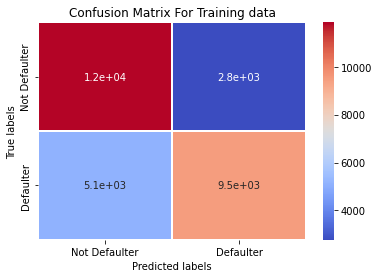

In [ ]:
# Get the confusion matrix for  training  data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_train_sm,y_train_class_preds_svm)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

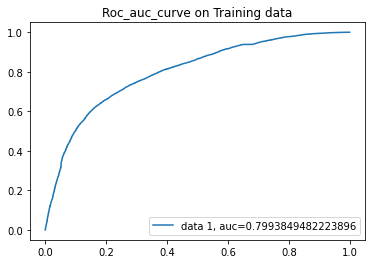

In [ ]:
# Roc_auc_curve on taining data
y_train_preds_proba_svm = svm_model.predict_proba(X_train_sm)[::,1]

fpr, tpr, _ = roc_curve(Y_train_sm,  y_train_preds_proba_svm )
auc = roc_auc_score(Y_train_sm,  y_train_preds_proba_svm )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
# Inserting metrices for Support Vector Machine in the dataframe 
evaluation_metrices_df.loc[i,"Model_Name"]='Support Vector Machine'

# Evaluation of testing model
print_metrics(Y_test,y_test_class_preds_svm)
i+=1  # i is a incremented variable

accuracy_score is 0.7762857866734229
 precision_score is 0.5737833594976453
recall_score is 0.6825396825396826
f1_score is 0.623454157782516
roc_auc_score is 0.7468678941210236
confusion_matrix is [[2333  543]
 [ 340  731]]
classification_report is               precision    recall  f1-score   support

           0       0.87      0.81      0.84      2876
           1       0.57      0.68      0.62      1071

    accuracy                           0.78      3947
   macro avg       0.72      0.75      0.73      3947
weighted avg       0.79      0.78      0.78      3947



[[2144  732]
 [  97  974]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

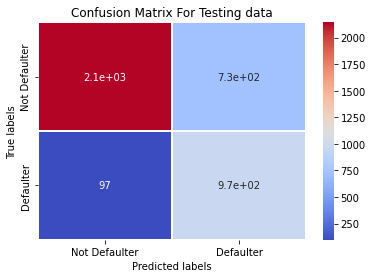

In [ ]:
# Get the confusion matrix for  testing data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_test,y_test_class_preds_knn)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

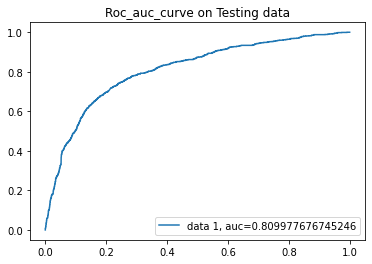

In [ ]:
# Roc_auc_curve testing data
y_test_preds_proba_svm = svm_model.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(Y_test,  y_test_preds_proba_svm )
auc = roc_auc_score(Y_test,  y_test_preds_proba_svm )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

# XG Boosting

In [ ]:
from xgboost import  XGBClassifier

In [ ]:
param_test1 = {
 'max_depth':range(2,3,6),
 'min_child_weight':range(1,2,6)}

In [ ]:
# xg boost with grid search cv
xgb_grid = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1 ,objective= 'binary:logistic'), 
 param_grid = param_test1, scoring='roc_auc', cv=3)

In [ ]:
xgb_grid.fit(X_train_sm,Y_train_sm)

GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=5),
             param_grid={'max_depth': range(2, 3, 6),
                         'min_child_weight': range(1, 2, 6)},
             scoring='roc_auc')

In [ ]:
xgb_grid.best_params_

{'max_depth': 2, 'min_child_weight': 1}

In [ ]:
optimized_xgb=xgb_grid.best_estimator_
optimized_xgb

XGBClassifier(max_depth=2)

In [ ]:
xgb_grid.best_score_

0.8169594282822367

In [ ]:
# model score  on training data
print(f"training_model_score:  {xgb_grid.score(X_train_sm,Y_train_sm )}")

# model score on testing data
print(f"testing_model_score:  {xgb_grid.score(X_test,Y_test)}")

training_model_score:  0.8412529441630754
testing_model_score:  0.7835102051947345


In [ ]:
# Get the predicted classes
y_train_class_preds_xgb = xgb_grid.predict(X_train_sm)
y_test_class_preds_xgb = xgb_grid.predict(X_test)

In [ ]:
y_test_class_preds_xgb

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
Y_test

6281     1
10210    0
26384    0
14927    1
7705     0
        ..
14940    0
13816    0
17573    0
12637    1
19502    0
Name: Defaulter_Payment, Length: 3947, dtype: int64

In [ ]:
# Evaluation of training model
print_metrics(Y_train_sm,y_train_class_preds_xgb)

accuracy_score is 0.7648365923697525
 precision_score is 0.8075915190979115
recall_score is 0.6953370709695064
f1_score is 0.7472721260883941
roc_auc_score is 0.7648365923697524
confusion_matrix is [[12203  2423]
 [ 4456 10170]]
classification_report is               precision    recall  f1-score   support

           0       0.73      0.83      0.78     14626
           1       0.81      0.70      0.75     14626

    accuracy                           0.76     29252
   macro avg       0.77      0.76      0.76     29252
weighted avg       0.77      0.76      0.76     29252



[[12203  2423]
 [ 4456 10170]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

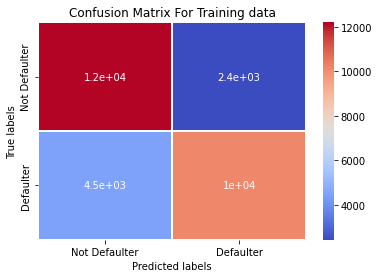

In [ ]:
# Get the confusion matrix for  training  data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_train_sm,y_train_class_preds_xgb)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

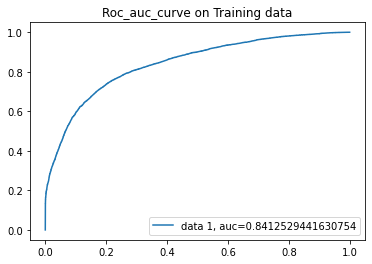

In [ ]:
# Roc_auc_curve on taining data
y_train_preds_proba_xgb = xgb_grid.predict_proba(X_train_sm)[::,1]
fpr, tpr, _ = roc_curve(Y_train_sm,  y_train_preds_proba_xgb )
auc = roc_auc_score(Y_train_sm,  y_train_preds_proba_xgb )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
# Inserting metrices for XG Boosting in the dataframe 
evaluation_metrices_df.loc[i,"Model_Name"]='XG Boosting'
# Evaluation of testing model
print_metrics(Y_test,y_test_class_preds_xgb)
i+=1  # i is a incremented variable

accuracy_score is 0.7664048644540157
 precision_score is 0.5664585191793042
recall_score is 0.5929038281979458
f1_score is 0.5793795620437956
roc_auc_score is 0.7119595636121858
confusion_matrix is [[2390  486]
 [ 436  635]]
classification_report is               precision    recall  f1-score   support

           0       0.85      0.83      0.84      2876
           1       0.57      0.59      0.58      1071

    accuracy                           0.77      3947
   macro avg       0.71      0.71      0.71      3947
weighted avg       0.77      0.77      0.77      3947



[[2390  486]
 [ 436  635]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

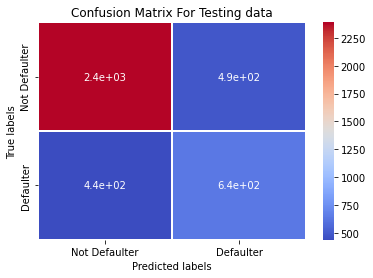

In [ ]:
# Get the confusion matrix for  testing data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_test,y_test_class_preds_xgb)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

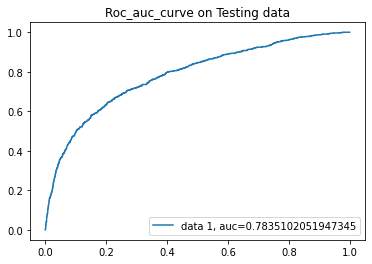

In [ ]:
# Roc_auc_curve testing data
y_test_preds_proba_xgb = xgb_grid.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(Y_test,  y_test_preds_proba_xgb)
auc = roc_auc_score(Y_test,  y_test_preds_proba_xgb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

# Gaussian Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB().fit(X_train_sm,Y_train_sm)

In [ ]:
naive_bayes_model.score(X_train_sm, Y_train_sm)

0.6351702447695884

In [ ]:
# Get the y- train & test predicted values
y_train_preds_gaussian_nb = naive_bayes_model.predict(X_train_sm)
y_test_preds_gaussian_nb = naive_bayes_model.predict(X_test)

In [ ]:
#get the accuracy score
nb_train_accuracy = accuracy_score(Y_train_sm, y_train_preds_gaussian_nb)
nb_test_accuracy = accuracy_score(Y_test, y_test_preds_gaussian_nb)

print("The accuracy on train data is ", nb_train_accuracy)
print("The accuracy on test data is ", nb_test_accuracy)

The accuracy on train data is  0.6351702447695884
The accuracy on test data is  0.5867747656447935


In [ ]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds_gaussian_nb = naive_bayes_model.predict(X_train_sm)
y_test_class_preds_gaussian_nb = naive_bayes_model.predict(X_test)

In [ ]:
y_test_class_preds_gaussian_nb

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
Y_test

6281     1
10210    0
26384    0
14927    1
7705     0
        ..
14940    0
13816    0
17573    0
12637    1
19502    0
Name: Defaulter_Payment, Length: 3947, dtype: int64

In [ ]:
# Evaluation of training model
print_metrics(Y_train_sm,y_train_class_preds_gaussian_nb)

accuracy_score is 0.6351702447695884
 precision_score is 0.613087747397323
recall_score is 0.7328045945576371
f1_score is 0.6676217765042981
roc_auc_score is 0.6351702447695884
confusion_matrix is [[ 7862  6764]
 [ 3908 10718]]
classification_report is               precision    recall  f1-score   support

           0       0.67      0.54      0.60     14626
           1       0.61      0.73      0.67     14626

    accuracy                           0.64     29252
   macro avg       0.64      0.64      0.63     29252
weighted avg       0.64      0.64      0.63     29252



[[ 7862  6764]
 [ 3908 10718]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

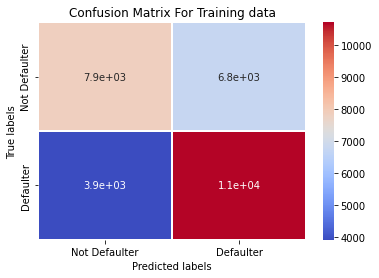

In [ ]:
# Get the confusion matrix for  training  data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_train_sm,y_train_class_preds_gaussian_nb)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

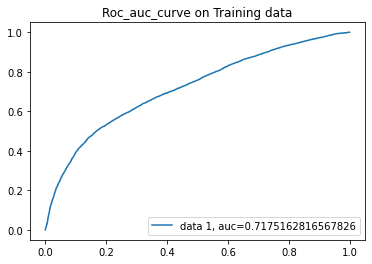

In [ ]:
# Roc_auc_curve on taining data
y_train_preds_proba_gaussian_nb = naive_bayes_model.predict_proba(X_train_sm)[::,1]

fpr, tpr, _ = roc_curve(Y_train_sm,  y_train_preds_proba_gaussian_nb )
auc = roc_auc_score(Y_train_sm,  y_train_preds_proba_gaussian_nb )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
# Inserting metrices for Gaussian Naive Bayes Classifier in the dataframe 
evaluation_metrices_df.loc[i,"Model_Name"]='Gaussian Naive Bayes Classifier'
# Evaluation of testing model
print_metrics(Y_test,y_test_class_preds_gaussian_nb)
i+=1  # i is a incremented variable

accuracy_score is 0.5867747656447935
 precision_score is 0.3700092850510678
recall_score is 0.7441643323996265
f1_score is 0.49426356589147297
roc_auc_score is 0.6361642246142778
confusion_matrix is [[1519 1357]
 [ 274  797]]
classification_report is               precision    recall  f1-score   support

           0       0.85      0.53      0.65      2876
           1       0.37      0.74      0.49      1071

    accuracy                           0.59      3947
   macro avg       0.61      0.64      0.57      3947
weighted avg       0.72      0.59      0.61      3947



[[1519 1357]
 [ 274  797]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

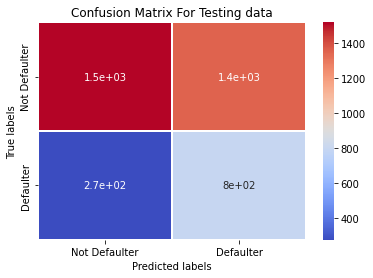

In [ ]:
# Get the confusion matrix for  testing data 

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_test,y_test_class_preds_gaussian_nb)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

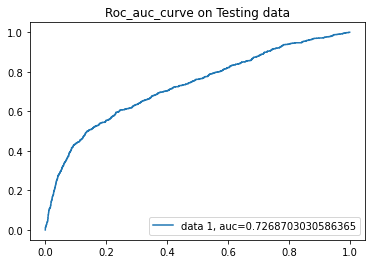

In [ ]:
# Roc_auc_curve testing data
y_test_preds_proba_gaussian_nb = naive_bayes_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,  y_test_preds_proba_gaussian_nb )
auc = roc_auc_score(Y_test,  y_test_preds_proba_gaussian_nb )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

# Evaluation of all models

In [ ]:
evaluation_metrices_df.set_index('Model_Name')

,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,RUC_AUC_Score
Model_Name,,,,,
Logistics regression,0.6810235621991386,0.44218942189421895,0.6713352007469654,0.5331850203930293,0.6779833166460835
Random Forest,0.8864960729668102,0.7778768956289027,0.8141923436041083,0.7956204379562044,0.8638068811205519
K-Neighbor Classifier,0.7899670635926019,0.570926143024619,0.9094304388422035,0.7014764133957508,0.8274551359718666
Support Vector Machine,0.7762857866734229,0.5737833594976453,0.6825396825396826,0.623454157782516,0.7468678941210236
XG Boosting,0.7664048644540157,0.5664585191793042,0.5929038281979458,0.5793795620437956,0.7119595636121858
Gaussian Naive Bayes Classifier,0.5867747656447935,0.3700092850510678,0.7441643323996265,0.49426356589147297,0.6361642246142778
